In [5]:
import pandas as pd
data = pd.read_csv('data\wine_cleared.csv')
#print(data['country'].value_counts())
data['is_france'] = data['country'].apply(lambda x: 1 if x == 'France' else 0)
data['is_italy'] = data['country'].apply(lambda x: 1 if x == 'Italy' else 0)
print(data['is_france'].sum())
print(data['is_italy'].sum())

22093
19540


In [132]:
regex = '\d{4}' # регулярное выражение для нахождения чисел
data['year'] = data['title'].str.findall(regex).str.get(0)
data['year2'] = data['title'].str.findall(regex).str.get(0)
data['year'] = pd.to_numeric(data['year'])
data['old_wine'] = data['year'].apply(lambda x: 1 if x < 2010 else 0)
print(data['old_wine'].sum())
#data['year'] = pd.to_datetime(data['year'], errors = 'coerce')

print(data['year'])

39781
0         2013.0
1         2011.0
2         2013.0
3         2013.0
4         2012.0
           ...  
129966    2013.0
129967    2004.0
129968    2013.0
129969    2012.0
129970    2012.0
Name: year, Length: 129971, dtype: float64


In [16]:
regex = '\(([^()]+)\)'
result = data['title'].str.findall(regex).str.get(0)
print(result)

0                           Etna
1                          Douro
2              Willamette Valley
3            Lake Michigan Shore
4              Willamette Valley
                   ...          
129966    Erben Müller-Burggraef
129967                    Oregon
129968                    Alsace
129969                    Alsace
129970                    Alsace
Name: title, Length: 129971, dtype: object


In [31]:
country_population = pd.read_csv('data\country_population.csv', sep=';')
print(country_population[country_population['country']=='Italy'])
df = data.join(country_population.set_index('country'), on='country')
print(df.loc[:,['title','population']])

   country  population
24   Italy  59,097,904
                                                    title   population
0                       Nicosia 2013 Vulkà Bianco  (Etna)   59,097,904
1           Quinta dos Avidagos 2011 Avidagos Red (Douro)   10,347,892
2           Rainstorm 2013 Pinot Gris (Willamette Valley)  333,022,386
3       St. Julian 2013 Reserve Late Harvest Riesling ...  333,022,386
4       Sweet Cheeks 2012 Vintner's Reserve Wild Child...  333,022,386
...                                                   ...          ...
129966  Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...   83,129,285
129967                  Citation 2004 Pinot Noir (Oregon)  333,022,386
129968  Domaine Gresser 2013 Kritt Gewurztraminer (Als...   68,035,000
129969      Domaine Marcel Deiss 2012 Pinot Gris (Alsace)   68,035,000
129970  Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...   68,035,000

[129972 rows x 2 columns]


In [38]:
country_area = pd.read_csv('data\country_area.csv', sep=';')
#print(country_area)
df2 = data.join(country_area.set_index('country'), on='country')
print(df2[df2['title']=='Gård 2014 Grand Klasse Reserve Lawrence Vineyards Viognier (Columbia Valley (WA))'])


    Unnamed: 0 country                                        description   
94          94      US  Barrel notes are prominent, with aromas of Cre...  \

                                designation  points  price    province   
94  Grand Klasse Reserve Lawrence Vineyards      88   22.0  Washington  \

                region_1       taster_name taster_twitter_handle   
94  Columbia Valley (WA)  Sean P. Sullivan         @wawinereport  \

                                                title   variety winery   
94  Gård 2014 Grand Klasse Reserve Lawrence Vineya...  Viognier   Gård  \

    is_france  is_italy    year  old_wine       area  
94          0         0  2014.0         0  9372610.0  


In [45]:
# инициализируем информацию о звонках
calls_list = [
    [460, '2013-12-17 04:55:39', '2013-12-17 04:55:44', '2013-12-17 04:55:45'],
    [12, '2013-12-16 20:03:20', '2013-12-16 20:03:22', '2013-12-16 20:07:13'],
    [56, '2013-12-16 20:03:20', '2013-12-16 20:03:20', '2013-12-16 20:05:04'],
    [980, '2013-12-16 20:03:20','2013-12-16 20:03:27', '2013-12-16 20:03:29'],
    [396, '2013-12-16 20:08:27', '2013-12-16 20:08:28','2013-12-16 20:12:03'],
    [449, '2013-12-16 20:03:20', '2013-12-16 20:03:25','2013-12-16 20:05:00'],
    [397, '2013-12-16 20:08:25', '2013-12-16 20:08:27', '2013-12-16 20:09:59'],
    [398, '2013-12-16 20:01:23', '2013-12-16 20:01:23', '2013-12-16 20:04:58'],
    [452, '2013-12-16 20:03:20', '2013-12-16 20:03:21','2013-12-16 20:04:55'],
    [440, '2013-12-16 20:03:20', '2013-12-16 20:04:26', '2013-12-16 20:04:32']
]

calls = pd.DataFrame(calls_list, columns = ['client_id',  'agent_date', 'created_at' ,'end_date'])

# преобразовываем признаки в формат datetime для удобной работы

calls['agent_date'] = pd.to_datetime(calls['agent_date'])
calls['created_at'] = pd.to_datetime(calls['created_at'])
calls['end_date'] = pd.to_datetime(calls['end_date'])
#print(calls)
calls['duration'] = (calls['end_date'] - calls['created_at']).dt.seconds
calls['time_connection'] = (calls['created_at'] - calls['agent_date']).dt.seconds
calls['is_connection'] = calls['duration'].apply(lambda x: 1 if x>10 else 0)
calls['time_diff'] = (calls['end_date'] - calls['agent_date']).dt.seconds
print(calls['time_diff'].sum())
calls = calls.drop(columns=['agent_date', 'created_at' ,'end_date'], axis=1)

1144


In [70]:
#ddd = pd.to_datetime('2022-01-12 00:00:00')
data['year2'] = pd.to_datetime(data['year2'], errors = 'coerce')
#data['const'] = pd.to_datetime('2022-01-12 00:00:00')
data['years_diff'] = (pd.to_datetime('2022-01-12') - data['year2']).dt.days
print(data['years_diff'].max())
#print(data.loc[:,['const','year']])


98627.0


In [ ]:
#5. Кодирование признаков. Методы
import category_encoders as ce 
clothing_list = [
    ['xxs', 'dress'],
    ['xxs', 'skirt'],
    ['xs', 'dress'],
    ['s', 'skirt'],
    ['m', 'dress'],
    ['l', 'shirt'],
    ['s', 'coat'],
    ['m', 'coat'],
    ['xxl', 'shirt'],
    ['l', 'dress']
]

clothing = pd.DataFrame(clothing_list, columns = ['size',  'type'])

# создаем объект OrdinalEncoder, col - имя столбца, mapping - словарь с описанием кодировки
ord_encoder = ce.OrdinalEncoder(mapping=[{
	'col': 'size',
	'mapping': {'xxs': 1, 'xs': 2, 's': 3, 
                'm': 4, 'l': 5, 'xxl': 6}
}])
# применяем трансформацию к столбцу
data_bin = ord_encoder.fit_transform(clothing[['size']])
# добавляем результат к исходному DataFrame
clothing = pd.concat([clothing, data_bin], axis=1)
print(clothing)

In [ ]:
encoder = ce.OneHotEncoder(cols=['type'], use_cat_names=True)
type_bin = encoder.fit_transform(clothing['type'])
clothing = pd.concat([clothing, type_bin], axis=1)
print(clothing)

In [81]:
encoder = ce.OneHotEncoder(cols=['taster_name'], use_cat_names=True)
type_bin = encoder.fit_transform(data['taster_name'])
dfa = pd.concat([data, type_bin], axis=1)
print(data.shape)
print(dfa.shape)

(129971, 20)
(129971, 40)


In [83]:
bin_encoder = ce.BinaryEncoder(cols=['country']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(data['country'])
dfc = pd.concat([data, type_bin], axis=1)
print(data.shape)
print(dfc.shape)

(129971, 20)
(129971, 26)


In [86]:
bin_encoder = ce.BinaryEncoder(cols=['taster_twitter_handle']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(data['taster_twitter_handle'])
dfc = pd.concat([data, type_bin], axis=1)
print(data.shape)
print(dfc.shape)

(129971, 20)
(129971, 25)


In [96]:
list_of_dicts = [
 {'product': 'Product1', 'price': 1200, 'payment_type': 'Mastercard'},
 {'product': 'Product2', 'price': 3600, 'payment_type': 'Visa'},
 {'product': 'Product3', 'price': 7500, 'payment_type': 'Amex'}
]
df = pd.DataFrame(list_of_dicts)
ord_encoder = ce.OrdinalEncoder(mapping=[{
	'col': 'product',
	'mapping': {'Product1': 1, 'Product2': 2, 'Product3': 3}
}])
data_bin = ord_encoder.fit_transform(df[['product']])
# добавляем результат к исходному DataFrame
df = pd.concat([df, data_bin], axis=1)

encoder = ce.OneHotEncoder(cols=['payment_type'], use_cat_names=True)
type_bin = encoder.fit_transform(df['payment_type'])
df = pd.concat([df, type_bin], axis=1)

print(df)

    product  price payment_type  product  payment_type_Mastercard   
0  Product1   1200   Mastercard        1                        1  \
1  Product2   3600         Visa        2                        0   
2  Product3   7500         Amex        3                        0   

   payment_type_Visa  payment_type_Amex  
0                  0                  0  
1                  1                  0  
2                  0                  1  


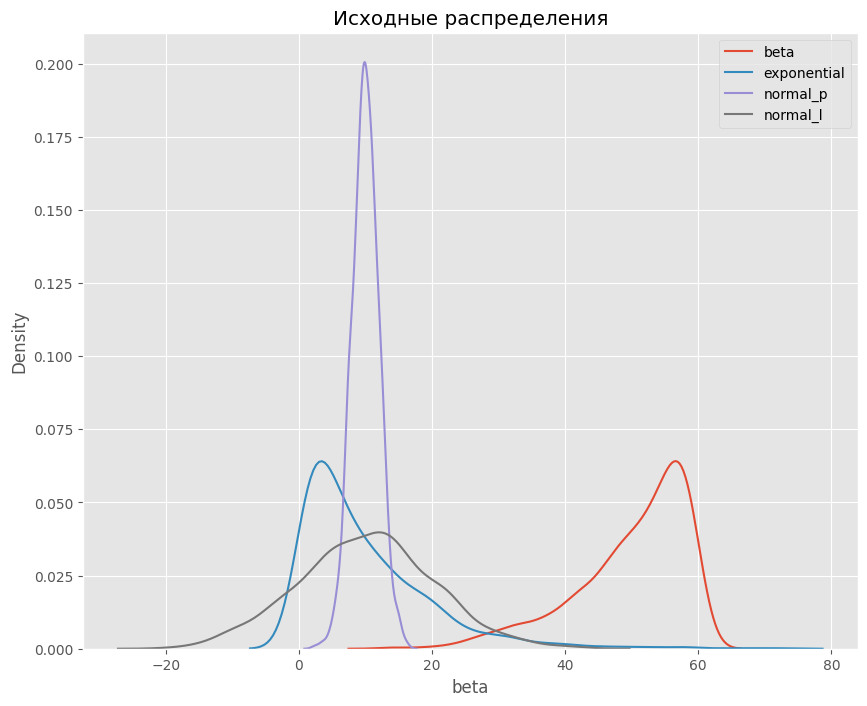

In [98]:
#6. Преобразование признаков. Нормализация. Стандартизация
import numpy as np
np.random.seed(34)

# для нормализации, стандартизации
from sklearn import preprocessing

# Для графиков
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
matplotlib.style.use('ggplot')

# сгенерируем датасет из случайных чисел
df = pd.DataFrame({ 
    # Бета распределение, 5 – значение альфа, 1 – значение бета, 1000 – размер
    'beta': np.random.beta(5, 1, 1000) * 60,
    
    # Экспоненциальное распределение, 10 – "резкость" экспоненты, 1000 – размер
    'exponential': np.random.exponential(10, 1000),
    
    # Нормальное распределение, 10 – среднее значение р., 2 – стандартное отклонение, 1000 – количество сэмплов
    'normal_p': np.random.normal(10, 2, 1000),
    
    # Нормальное распределение, 10 – среднее значение р., 10 – стандартное отклонение, 1000 – количество сэмплов
    'normal_l': np.random.normal(10, 10, 1000),
})

# Копируем названия столбцов, которые теряются при использовании fit_transform()
col_names = list(df.columns)

# зададим параметры холста, название и визуализируем кривые распределения:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Исходные распределения')

# kdeplot() (KDE – оценка плотности ядра) – специальный метод для графиков распределений
sns.kdeplot(df['beta'], ax=ax1, label ='beta')
sns.kdeplot(df['exponential'], ax=ax1, label ='exponential')
sns.kdeplot(df['normal_p'], ax=ax1, label ='normal_p')
sns.kdeplot(df['normal_l'], ax=ax1, label ='normal_l')
plt.legend()

In [99]:
print(df.describe())

              beta  exponential     normal_p     normal_l
count  1000.000000  1000.000000  1000.000000  1000.000000
mean     50.024249    10.028387     9.994006    10.175745
std       8.474545     9.733928     2.013971    10.104004
min      13.854022     0.007617     2.356844   -19.539980
25%      45.793283     2.951421     8.687478     3.566822
50%      52.337504     7.018565     9.983498    10.326331
75%      56.722191    14.022485    11.306914    16.615057
max      59.990640    71.344341    16.214364    42.072915


              beta  exponential     normal_p     normal_l
count  1000.000000  1000.000000  1000.000000  1000.000000
mean      0.783981     0.140471     0.551120     0.482297
std       0.183684     0.136450     0.145334     0.163992
min       0.000000     0.000000     0.000000     0.000000
25%       0.692276     0.041266     0.456837     0.375032
50%       0.834120     0.098280     0.550362     0.484741
75%       0.929157     0.196461     0.645864     0.586810
max       1.000000     1.000000     1.000000     1.000000


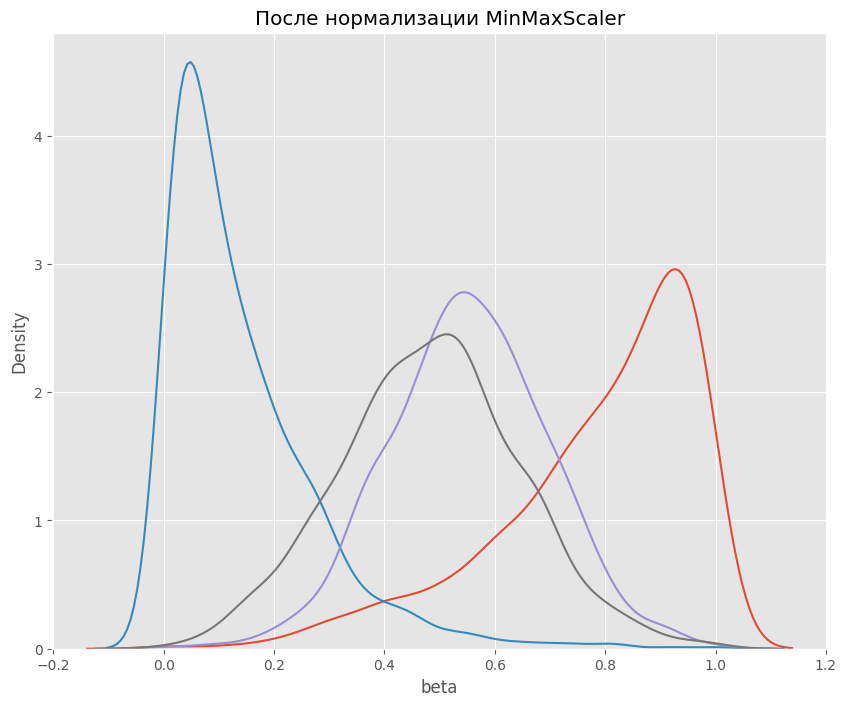

In [102]:
# инициализируем нормализатор MinMaxScaler
mm_scaler = preprocessing.MinMaxScaler()

# кодируем исходный датасет
df_mm = mm_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_mm = pd.DataFrame(df_mm, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('После нормализации MinMaxScaler')

sns.kdeplot(df_mm['beta'], ax=ax1)
sns.kdeplot(df_mm['exponential'], ax=ax1)
sns.kdeplot(df_mm['normal_p'], ax=ax1)
sns.kdeplot(df_mm['normal_l'], ax=ax1)
print(df_mm.describe())

               beta   exponential      normal_p     normal_l
count  1.000000e+03  1.000000e+03  1.000000e+03  1000.000000
mean  -2.116639e-01  2.718638e-01  4.011529e-03    -0.011541
std    7.754247e-01  8.792225e-01  7.688570e-01     0.774358
min   -3.521256e+00 -6.332678e-01 -2.911564e+00    -2.288916
25%   -5.987992e-01 -3.673671e-01 -4.947706e-01    -0.518040
50%    3.252607e-16 -4.011548e-17  3.390842e-16     0.000000
75%    4.012008e-01  6.326329e-01  5.052294e-01     0.481960
max    7.002654e-01  5.810261e+00  2.378706e+00     2.433017


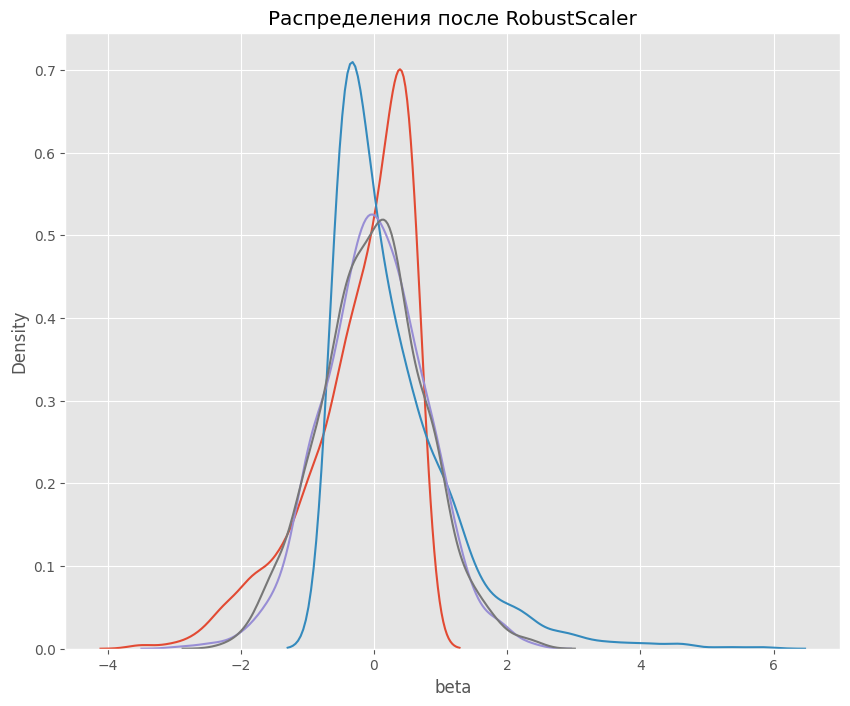

In [103]:
# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()

# кодируем исходный датасет
df_r = r_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_r = pd.DataFrame(df_r, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после RobustScaler')

sns.kdeplot(df_r['beta'], ax=ax1)
sns.kdeplot(df_r['exponential'], ax=ax1)
sns.kdeplot(df_r['normal_p'], ax=ax1)
sns.kdeplot(df_r['normal_l'], ax=ax1)
print(df_r.describe())

               beta   exponential      normal_p      normal_l
count  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03
mean   6.075140e-16 -1.776357e-18  8.100187e-16 -2.398082e-17
std    1.000500e+00  1.000500e+00  1.000500e+00  1.000500e+00
min   -4.270238e+00 -1.029983e+00 -3.793988e+00 -2.942457e+00
25%   -4.995057e-01 -7.274049e-01 -6.490566e-01 -6.544169e-01
50%    2.731017e-01 -3.093641e-01 -5.220134e-03  1.491105e-02
75%    7.907555e-01  4.105327e-01  6.522262e-01  6.376219e-01
max    1.176627e+00  6.302351e+00  3.090149e+00  3.158464e+00


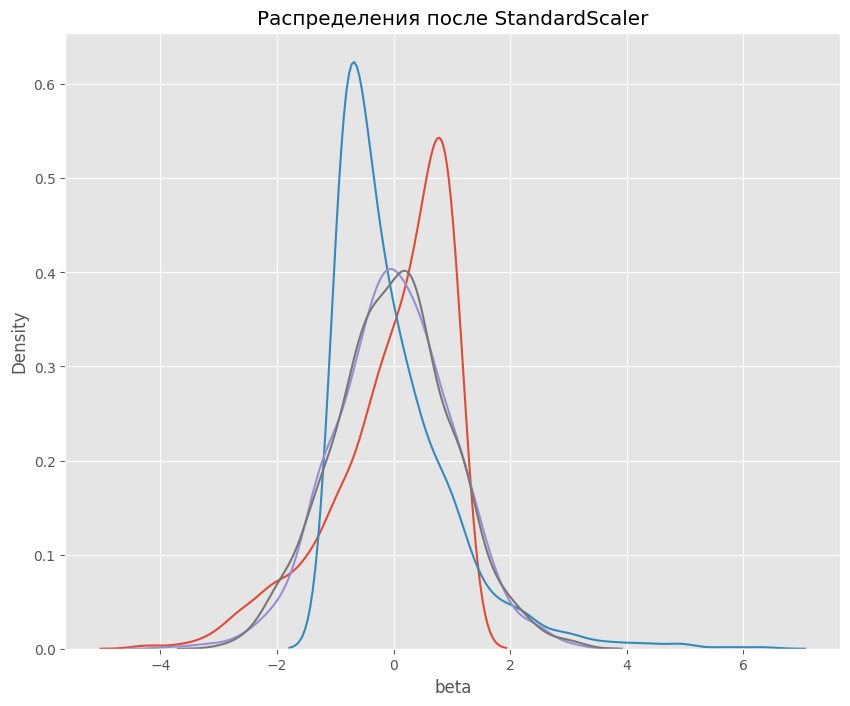

In [105]:
# инициализируем стандартизатор StandardScaler
s_scaler = preprocessing.StandardScaler()

# кодируем исходный датасет
df_s = s_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_s = pd.DataFrame(df_s, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после StandardScaler')

sns.kdeplot(df_s['beta'], ax=ax1)
sns.kdeplot(df_s['exponential'], ax=ax1)
sns.kdeplot(df_s['normal_p'], ax=ax1)
sns.kdeplot(df_s['normal_l'], ax=ax1)
print(df_s.describe())

43501.229482424984
-0.13551812448719314


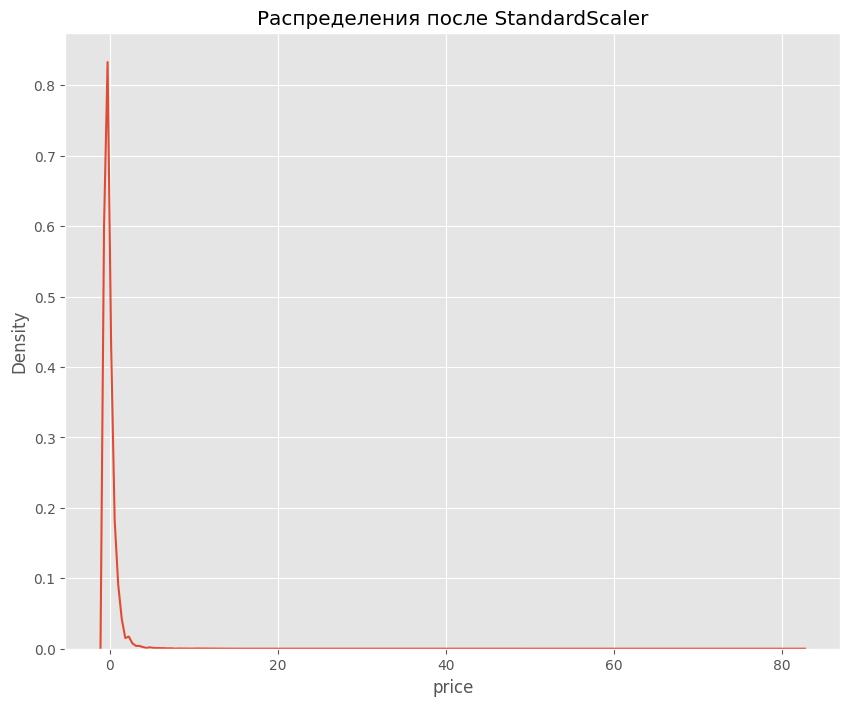

In [121]:
df = data.loc[:,['points','price']]
df_r = r_scaler.fit_transform(df)
col_names = list(df.columns)
# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_r = pd.DataFrame(df_r, columns=col_names)

#print(df_r.describe())
print(df_r['price'].sum())


# инициализируем стандартизатор StandardScaler
df = data.loc[:,['price']]
col_names = list(df.columns)
s_scaler = preprocessing.StandardScaler()
df_s = s_scaler.fit_transform(df)
df_s = pd.DataFrame(df_s, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после StandardScaler')

sns.kdeplot(df_s['price'], ax=ax1)

#print(df_s.describe())
print(df_s['price'][129968])

In [129]:
#7. Отбор признаков. Мультиколлинеарность
iris = pd.read_csv('data/iris.csv')
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


<Axes: >

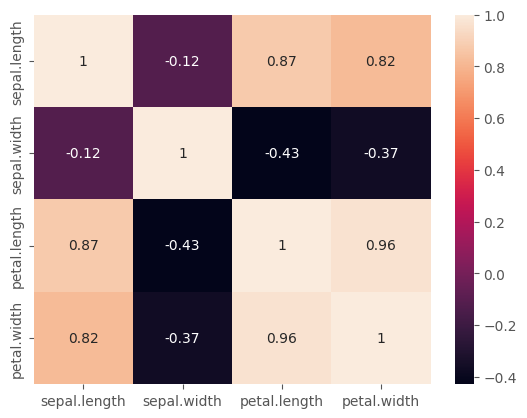

In [125]:
sns.heatmap(iris.corr(numeric_only=True), annot=True)

In [130]:
iris = iris.drop(['petal.width'], axis=1)
iris = iris.drop(['petal.length'], axis=1)
iris.head()

,sepal.length,sepal.width,variety
0,5.1,3.5,Setosa
1,4.9,3.0,Setosa
2,4.7,3.2,Setosa
3,4.6,3.1,Setosa
4,5.0,3.6,Setosa


<Axes: >

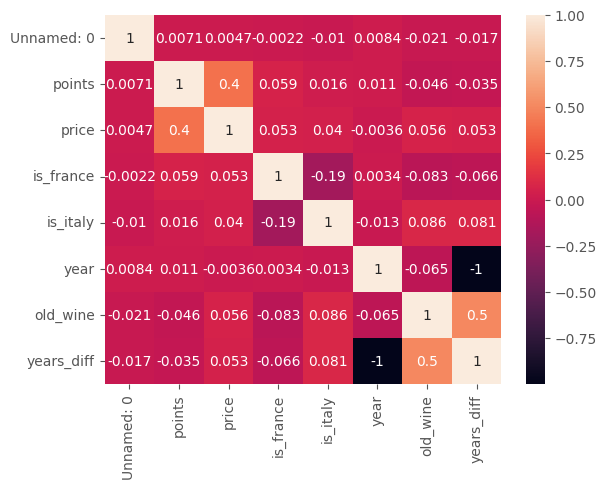

In [131]:
sns.heatmap(data.corr(numeric_only=True), annot=True)

In [160]:
hearts = pd.read_csv('data/heart.csv',sep=',')
hearts['old'] = hearts['age'].apply(lambda x: 1 if x>60 else 0)
hearts.head()
hearts['old'].sum()


79

In [185]:
hearts['age_sex'] = hearts['age'].astype(str)+'_'+hearts['sex'].astype(str)

def get_age_group(age_sex):
    if age_sex[2]=='_':
        age_g = int(age_sex[0:2])
        sex_g = int(age_sex[-1])
    #print(age_g,sex_g)        
    if age_g<=20:
        if sex_g == 1:
           return 123#'123/76'
        else:
           return 116#'116/72' 
    elif (age_g>=21)and(age_g<=30):
        if sex_g == 1:
           return 126#'126/79'
        else:
           return 120#'120/75'  
    elif (age_g>=31)and(age_g<=40):
        if sex_g == 1:
           return 129#'129/81'
        else:
           return 127#'127/80'           
    elif (age_g>=41)and(age_g<=50):
        if sex_g == 1:
           return 135#'135/83'
        else:
           return 137#'137/84'                
    elif (age_g>=51)and(age_g<=60):
        if sex_g == 1:
           return 142#'142/85'
        else:
           return 144#'144/85'                
    elif age_g>=61:
        if sex_g == 1:
           return 142#'142/80'
        else:
           return 159#'159/85'     
             
hearts['trestbps_mean'] = hearts['age_sex'].apply(get_age_group)
hearts = hearts.drop(['age_sex'],axis=1)
#print(hearts['trestbps_mean'][300])
hearts.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old,trestbps_mean
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1,142
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,129
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,137
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,142
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0,144


In [187]:
#print(hearts['thal'].value_counts())
encoder1 = ce.OneHotEncoder(cols=['cp'])#, use_cat_names=True
type_bin = encoder1.fit_transform(hearts['cp'])
hearts1 = pd.concat([hearts, type_bin], axis=1)

encoder2 = ce.OneHotEncoder(cols=['restecg'])#, use_cat_names=True
type_bin = encoder2.fit_transform(hearts['restecg'])
hearts2 = pd.concat([hearts1, type_bin], axis=1)

encoder3 = ce.OneHotEncoder(cols=['slope'])#, use_cat_names=True
type_bin = encoder3.fit_transform(hearts['slope'])
hearts3 = pd.concat([hearts2, type_bin], axis=1)

encoder4 = ce.OneHotEncoder(cols=['ca'])#, use_cat_names=True
type_bin = encoder4.fit_transform(hearts['ca'])
hearts4 = pd.concat([hearts3, type_bin], axis=1)

encoder5 = ce.OneHotEncoder(cols=['thal'])#, use_cat_names=True
type_bin = encoder5.fit_transform(hearts['thal'])
hearts5 = pd.concat([hearts4, type_bin], axis=1)

hearts5 = hearts5.drop(['cp','restecg','slope','ca','thal'],axis=1)
hearts5.shape

(303, 30)

In [193]:
#df = data.loc[:,['points','price']]
hearts_r = r_scaler.fit_transform(hearts5)
col_names = list(hearts5.columns)
# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
hearts_r = pd.DataFrame(hearts_r, columns=col_names)
hearts_r.describe()
print(hearts_r['chol'].std())

0.8162322990225203


In [ ]:
s_scaler = preprocessing.StandardScaler()

# кодируем исходный датасет
hearts_s = s_scaler.fit_transform(hearts5)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
hearts_s = pd.DataFrame(hearts_s, columns=col_names)
hearts_s.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old,trestbps_mean
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1,142
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,129
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,137
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,142
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0,144


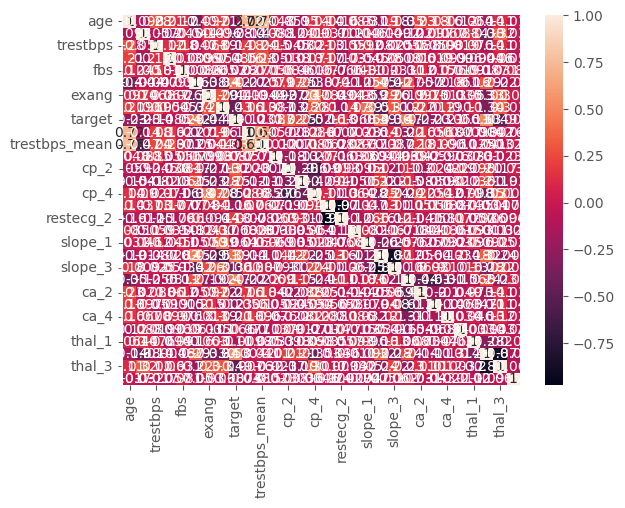

In [199]:
sns.heatmap(hearts5.corr(numeric_only=True), annot=True)
hearts.head()